In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 97% 1.03G/1.06G [00:09<00:00, 248MB/s]
100% 1.06G/1.06G [00:09<00:00, 123MB/s]


In [ ]:
# !unzip /content/dogs-vs-cats.zip -d /content/dogs-vs-cats

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [ ]:
# generator
# Load training and validation datasets
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory='/content/dogs-vs-cats/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

validation_ds = tf.keras.utils.image_dataset_from_directory(
    directory='/content/dogs-vs-cats/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize pixel values to be between 0 and 1
def process(image, label):
    image = tf.cast(image / 255.0, tf.float32)
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# Define the CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Use 'sigmoid' for binary classification
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 30, 30, 128)      

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 57s 87ms/step - loss: 0.5884 - accuracy: 0.6781 - val_loss: 0.5254 - val_accuracy: 0.7526
Epoch 2/10
625/625 [==============================] - 54s 86ms/step - loss: 0.4664 - accuracy: 0.7770 - val_loss: 0.4605 - val_accuracy: 0.7868
Epoch 3/10
625/625 [==============================] - 54s 86ms/step - loss: 0.3550 - accuracy: 0.8374 - val_loss: 0.4749 - val_accuracy: 0.7964
Epoch 4/10
625/625 [==============================] - 51s 81ms/step - loss: 0.2335 - accuracy: 0.9022 - val_loss: 0.6203 - val_accuracy: 0.7722
Epoch 5/10
625/625 [==============================] - 52s 83ms/step - loss: 0.1351 - accuracy: 0.9467 - val_loss: 0.7815 - val_accuracy: 0.7750
Epoch 6/10
625/625 [==============================] - 51s 82ms/step - loss: 0.0898 - accuracy: 0.9680 - val_loss: 1.1736 - val_accuracy: 0.7828
Epoch 7/10
625/625 [==============================] - 51s 81ms/step - loss: 0.0629 - accuracy: 0.9790 - val_loss: 1.0153 - val_accuracy:

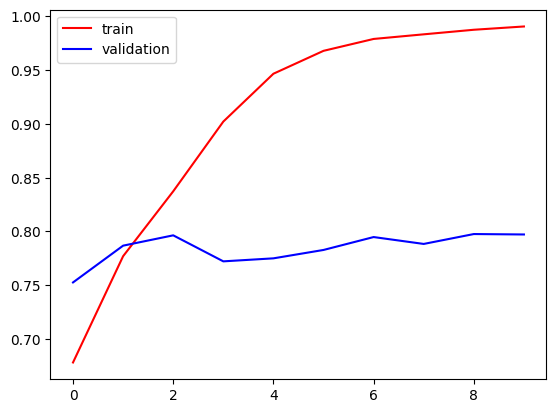

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

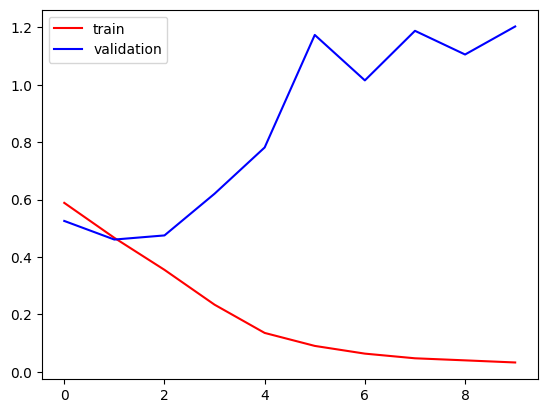

In [ ]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [31]:
# From above 2 graphs overfitting is seen . There are multiple of ways to address this . Lets use couple of methods like droupout and batch normalization

In [33]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout # last 2 are added here

In [34]:
# generator
# Load training and validation datasets
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory='/content/dogs-vs-cats/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

validation_ds = tf.keras.utils.image_dataset_from_directory(
    directory='/content/dogs-vs-cats/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [35]:
# Normalize pixel values to be between 0 and 1
def process(image, label):
    image = tf.cast(image / 255.0, tf.float32)
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [38]:
# Define the CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)),
    BatchNormalization(),  # Added BatchNormalization here
    MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),

    Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'),
    BatchNormalization(),  # Added BatchNormalization here
    MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),

    Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'),
    BatchNormalization(),  # Added BatchNormalization here
    MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.1),  # Added Dropout here
    Dense(64, activation='relu'),
    Dropout(0.1),  # Added Dropout here
    Dense(1, activation='sigmoid')  # Use 'sigmoid' for binary classification
])

In [39]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [40]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [41]:
# Train the model
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 74s 108ms/step - loss: 1.5766 - accuracy: 0.5684 - val_loss: 0.6193 - val_accuracy: 0.6640
Epoch 2/10
625/625 [==============================] - 69s 110ms/step - loss: 0.6054 - accuracy: 0.6777 - val_loss: 0.5808 - val_accuracy: 0.7190
Epoch 3/10
625/625 [==============================] - 65s 103ms/step - loss: 0.5108 - accuracy: 0.7484 - val_loss: 0.5156 - val_accuracy: 0.7214
Epoch 4/10
625/625 [==============================] - 65s 104ms/step - loss: 0.4586 - accuracy: 0.7874 - val_loss: 0.4367 - val_accuracy: 0.7990
Epoch 5/10
625/625 [==============================] - 77s 122ms/step - loss: 0.3897 - accuracy: 0.8248 - val_loss: 0.5593 - val_accuracy: 0.7552
Epoch 6/10
625/625 [==============================] - 67s 106ms/step - loss: 0.3330 - accuracy: 0.8532 - val_loss: 0.4398 - val_accuracy: 0.8118
Epoch 7/10
625/625 [==============================] - 64s 101ms/step - loss: 0.2666 - accuracy: 0.8870 - val_loss: 0.5952 - val_ac

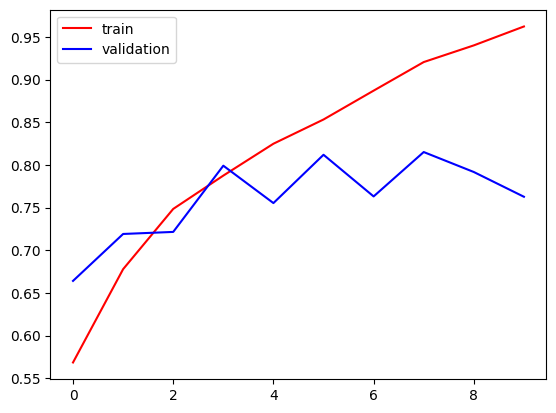

In [42]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

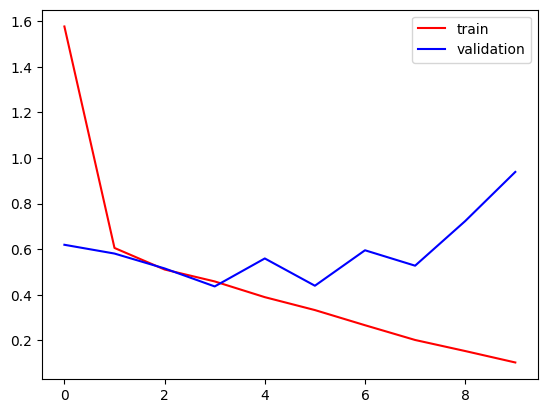

In [43]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [44]:
# better with test data. Thus we reduce overfitting to some extent. Thats not main purpose here .

1/1 [==============================] - 0s 30ms/step


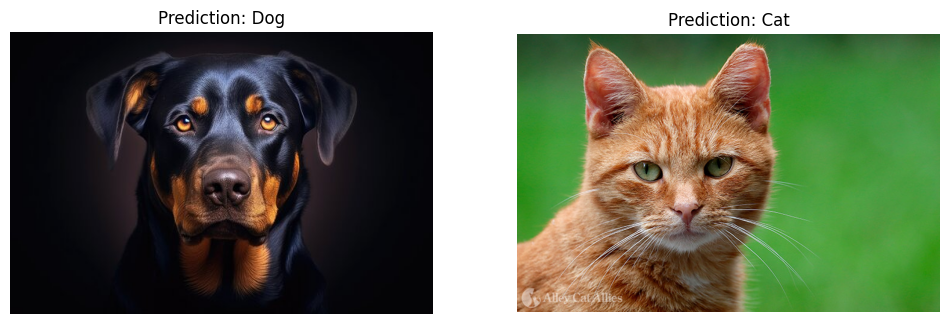

In [56]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_and_preprocess_image(img_path, target_size=(256, 256)):
    # Load the image using OpenCV
    img = cv2.imread(img_path)

    # Resize the image to the target size
    img = cv2.resize(img, target_size)

    # Convert the image from BGR (OpenCV format) to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Normalize the image
    img = img / 255.0

    # Expand dimensions to match the model's input shape
    img = np.expand_dims(img, axis=0)

    return img

def predict_image(img_path, model):
    # Load and preprocess the image
    preprocessed_img = load_and_preprocess_image(img_path)

    # Predict with the model
    prediction = model.predict(preprocessed_img)
    predicted_class = (prediction > 0.5).astype("int32")[0][0]

    return predicted_class

def display_images_side_by_side(img_paths, model):
    # Create a figure with subplots
    plt.figure(figsize=(12, 6))

    for i, img_path in enumerate(img_paths):
        # Predict the class for the image
        predicted_class = predict_image(img_path, model)

        # Load the original image for display
        original_img = cv2.imread(img_path)
        original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

        # Create subplot
        plt.subplot(1, len(img_paths), i + 1)
        plt.imshow(original_img)
        plt.axis('off')  # Hide the axis
        plt.title(f"Prediction: {'Dog' if predicted_class == 1 else 'Cat'}")

    plt.show()

# Example usage
img_paths = ['/content/dog.jpg', '/content/cat.jpg']
display_images_side_by_side(img_paths, model)
